### Name: Sohan Rudra
### Roll No: 16MA20054

In [1]:
#library imports
import math
from collections import namedtuple
from fractions import Fraction 
from copy import copy
import numpy as np
from numpy.linalg import inv
from sympy import symbols
import matplotlib.pyplot as plt

In [2]:
#some boilerplate code
x = symbols('x')
#Equation = namedtuple('Equation',('a','b'))
Conditions = namedtuple('Conditions',('n','f0','F0','Fn','h','e'))

In [1]:
%%latex
\begin{align}
f''' - ff'' + 1 - (f')^2 = 0\\
f_0 = 0\\
f'_0 = 0\\
f'_n = 1\\
n = 10\\
\end{align}

<IPython.core.display.Latex object>

In [4]:
def initializer(cond):
    Vals = np.zeros((2, cond.n + 1))
    #Vals[0] = np.arange()
    Vals[1][-1] = cond.Fn
    return Vals

In [5]:
def Finite_Diff_Solver(cond, f_k, verbose=True):
    n = cond.n
    a, b, c, d = np.zeros((n-2, 2, 2)), np.zeros((n-1, 2, 2)),\
    np.zeros((n-2, 2, 2)), np.zeros((n-1, 2))
    #A
    b[0] = np.array([[1.0, -cond.h/2.0], [(f_k[1][2] - f_k[1][0])/(2.0*cond.h),\
                                          (-2.0/cond.h**2 - 2.0*f_k[1][1])]])
    c[0] = np.array([[0.0, 0.0], [0.0, (1.0/cond.h**2 + f_k[0][1]/(2.0*cond.h))]])
    b[n-2] = np.array([[1.0, -cond.h/2.0], [(f_k[1][-1] - f_k[1][-3])/(2.0*cond.h),\
                                            (-2.0/cond.h**2 - 2.0*f_k[1][-2])]])
    a[n-3] = np.array([[-1.0, -cond.h/2.0], [0.0, (1.0/cond.h**2 -\
                                                   f_k[0][-2]/(2.0*cond.h))]])
    #d
    d[0] = np.array([f_k[0][0] -f_k[0][1] + cond.h/2.0 *(f_k[1][1] + f_k[1][0]),\
                     -1.0 + f_k[1][1]**2 - f_k[0][1]/(2.0*cond.h)*(f_k[1][2] -\
                    f_k[1][0]) - (f_k[1][2] - 2.0 * f_k[1][1] + f_k[1][0])/cond.h**2])
    d[n-2] = np.array([f_k[0][-3] - f_k[0][-2] + cond.h/2.0 *(f_k[1][-2] + f_k[1][-3]),\
                       -1.0 + f_k[1][-2]**2 - f_k[0][-2]/(2.0*cond.h)*(f_k[1][-1] -\
                    f_k[1][-2]) - (f_k[1][-3] - 2.0 * f_k[1][-2] + f_k[1][-1])/cond.h**2])
    for i, xi in enumerate(np.arange(1, cond.n-2), start=1):
        #print(i)
        a[i-1] = np.array([[-1.0, -cond.h/2.0], [0.0, (1.0/cond.h**2 -\
                                                f_k[0][i+1]/(2.0*cond.h))]])
        b[i] = np.array([[1.0, -cond.h/2.0], [(f_k[1][i+2] - f_k[1][i])/(2.0*cond.h),\
                                              (-2.0/cond.h**2 - 2.0*f_k[1][i+1])]])
        c[i] = np.array([[0.0, 0.0], [0.0, (1.0/cond.h**2 + f_k[0][i+1]/(2.0*cond.h))]])
        d[i] = np.array([f_k[0][i] - f_k[0][i+1] + cond.h/2.0 *(f_k[1][i+1] + f_k[1][i]),\
                         -1.0 + f_k[1][i+1]**2 - f_k[0][i+1]/(2.0*cond.h)*(f_k[1][i+2] -\
                    f_k[1][i+1]) - (f_k[1][i] - 2.0 * f_k[1][i+1] + f_k[1][i+2])/cond.h**2])
        
    if verbose:
        print("A={}, B={}, C={}, D={}".format(a,b,c,d))
        
    return (a,b,c,d)

In [6]:
def Thomas_Algorithm(coeff, cond, f_k):
    a, b, c, d = coeff
    n = cond.n
    c1 = np.zeros((n-2, 2, 2))
    d1 = np.zeros((n-1, 2))
    c1[0] = inv(b[0]).dot(c[0])
    d1[0] = inv(b[0]).dot(d[0])
    #print(d1.shape)
    for i in range(1,n-2):
        t1 = b[i]-a[i-1].dot(c1[i-1])
        c1[i] = inv(t1).dot(c[i])
        d1[i] = inv(t1).dot(d[i] - a[i-1].dot(d1[i-1]))
    d1[n-2] = inv(b[n-2] - a[n-3].dot(c1[n - 3])).dot(d[n-2] - a[n-3].dot(d1[n-3]))
    def backsubstitution(c,d):
        y = np.zeros_like(d)
        y[-1] = d[-1]
        cache = y[-1]
        #print(cache.shape)
        for i in reversed(range(d.shape[0]-1)):
            y[i] = d[i] - c[i].dot(cache)
            cache = y[i]
        return y
    fin_y = backsubstitution(c1,d1)
    #print(fin_y.shape)
    dfn = cond.h/2.0 * (f_k[1][-1] + f_k[1][-2] + fin_y.T[1][-1]) +\
    fin_y.T[0][-1] + f_k[0][-2] - f_k[0][-1]
    dFn = 0.0
    #print( np.array([dfn, dFn]))
    y = np.concatenate((fin_y, np.array([[dfn, dFn]])))
    y = np.concatenate((np.array([[0.0, 0.0]]), y))
    #print(y)
    return y.T

In [7]:
def Newton_Solver(cond):
    print(cond.n)
    #print(initializer(cond))
    y_k = initializer(cond)
    tuples_coeff = Finite_Diff_Solver(cond, y_k, verbose=False)
    dy = Thomas_Algorithm(tuples_coeff, cond, y_k)
    y = y_k + dy
    s = np.max(abs(y[0] - y_k[0]))
    y_k = y
    solutions = []
    while(s > cond.e):
        y_k = copy(y)
        solutions.append(y_k)
        tuples_coeff = Finite_Diff_Solver(cond, y_k, verbose=False)
        dy = Thomas_Algorithm(tuples_coeff, cond, y_k)
        y = y_k + dy
        s = np.max(abs(y[0] - y_k[0]))
        #print(s)
        
    y_k = y
    solutions.append(y_k)
    return solutions

In [8]:
cond = Conditions(100,0.0,0.0,1.0,0.1,0.001)

In [10]:
y = Newton_Solver(cond)
print(y)

100
[array([[  0.00000000e+00,   2.81706513e-02,   1.12182605e-01,
          2.51035862e-01,   4.43730422e-01,   6.89266284e-01,
          9.86643448e-01,   1.33486192e+00,   1.73292169e+00,
          2.17982276e+00,   2.67456513e+00,   3.21614881e+00,
          3.80357379e+00,   4.43584008e+00,   5.11194766e+00,
          5.83089655e+00,   6.59168674e+00,   7.39331824e+00,
          8.23479104e+00,   9.11510514e+00,   1.00332605e+01,
          1.09882572e+01,   1.19790953e+01,   1.30047746e+01,
          1.40642952e+01,   1.51566571e+01,   1.62808603e+01,
          1.74359048e+01,   1.86207907e+01,   1.98345178e+01,
          2.10760862e+01,   2.23444959e+01,   2.36387470e+01,
          2.49578393e+01,   2.63007730e+01,   2.76665479e+01,
          2.90541641e+01,   3.04626217e+01,   3.18909205e+01,
          3.33380607e+01,   3.48030422e+01,   3.62848649e+01,
          3.77825290e+01,   3.92950343e+01,   4.08213810e+01,
          4.23605690e+01,   4.39115982e+01,   4.54734688e+01,
   

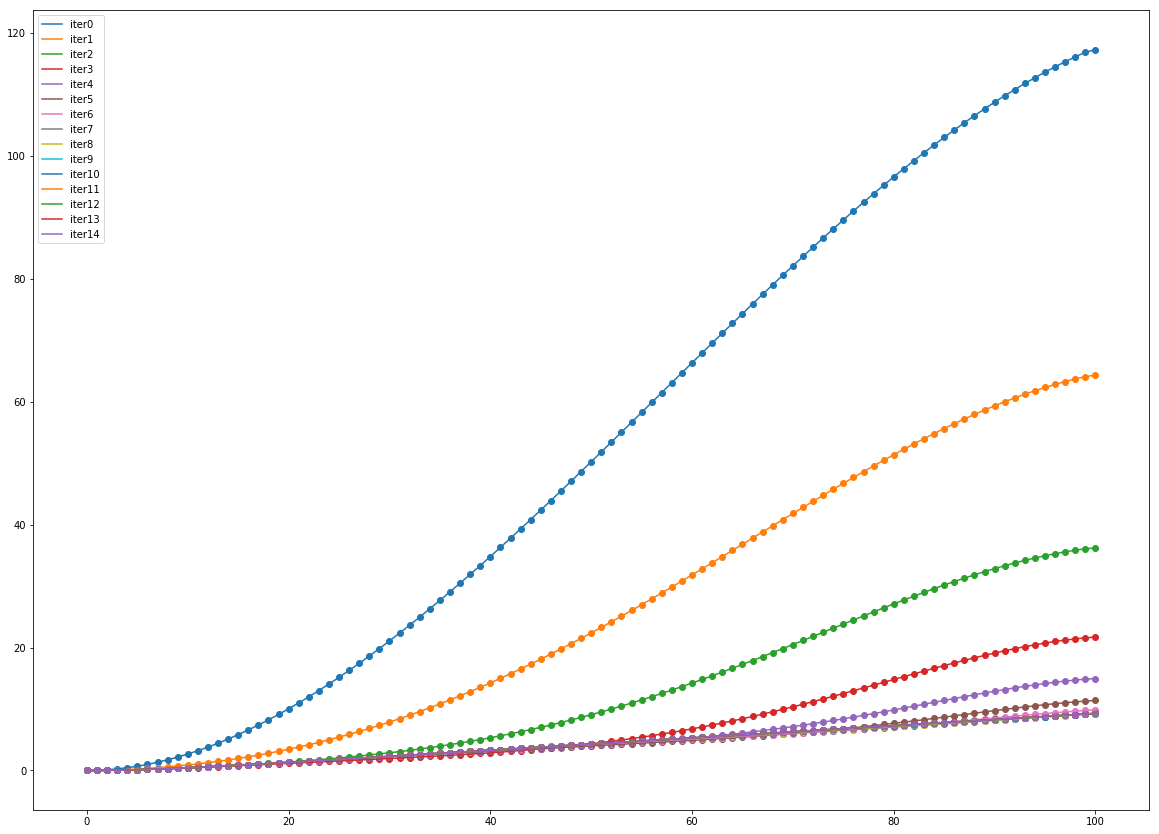

In [12]:
#t1 = np.arange(cond.x0, cond.xn, 0.001)
x_range = np.arange(0, cond.n + 1)
fig = plt.figure(figsize=(20, 50))
ax = fig.add_subplot(311)
g = []
for i in range(len(y)):
    ax.plot(x_range, y[i][0])
    ax.scatter(x_range, y[i][0])
    g.append("iter"+str(i))
ax.legend(tuple(g))
fig.show()

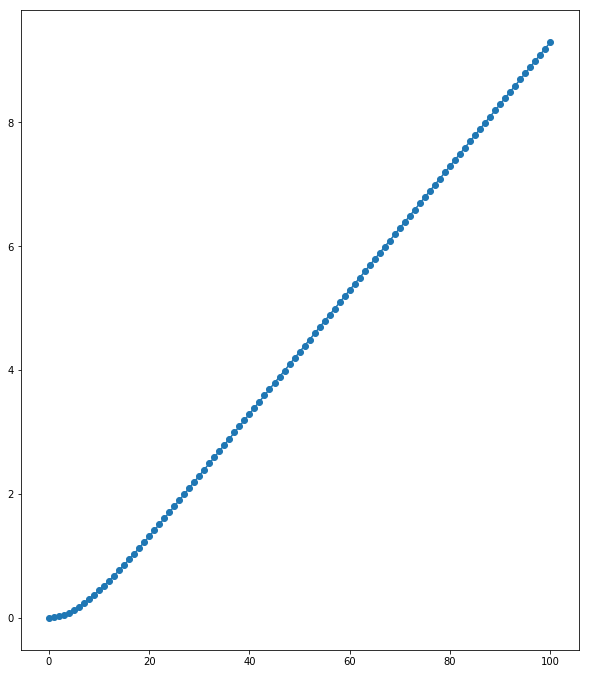

In [11]:
fig = plt.figure(figsize=(10,40))
x_range = np.arange(0, cond.n + 1)
ax = fig.add_subplot(311)
ax.plot(x_range, y[-1][0])
ax.scatter(x_range, y[-1][0])
fig.show()